# Problem Set 8
Holly Do

In [1]:
import random as rnd
import math as mth
import statistics as sts
import numpy as np
import scipy as sci
import scipy.linalg as la
import scipy.stats as st
import scipy.special as spp
import matplotlib.pyplot as plt
import sympy as sy
import stemgraphic as stm

import itertools as it
import operator as op

# 1.1

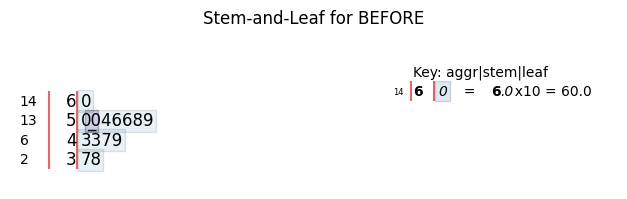

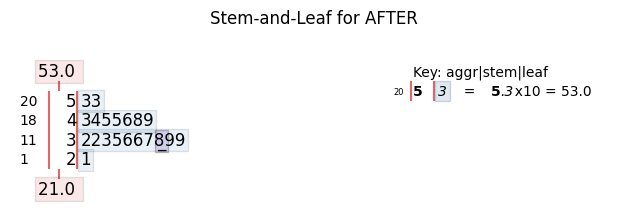

In [3]:

#after = 53, 21, 32, 49, 45, 38, 44, 33, 32, 43, 53, 46, 36, 48, 39, 35, 37, 36, 39, 45
#b4 = 56, 47, 49, 37, 38, 60, 50, 43, 43, 59, 50, 56, 54, 58

# read before data into b4 numpy array 
b4 = np.loadtxt('Prob1-Firewall-Before.txt', delimiter=',')
# read "after" data into after
after = np.loadtxt('Prob1-Firewall-After.txt', delimiter=',')
# use python stm (stem and leaf)
_ = stm.stem_graphic(b4,scale=10)
_ = plt.title('Stem-and-Leaf for BEFORE')
_ = stm.stem_graphic(after,scale=10)
_ = plt.title('Stem-and-Leaf for AFTER')

# 1.2

What is in a 5 pt summary?
 1. min,Q1,median,Q3,max

Boxplot shows:
1. "Box" around Q1 to Q3
2. Median line (inside box)
3. Whiskers : use interquartile range (IQR). IQR = Q3 - Q1  
   Low whisker: smallest value inside the Q1 - 1.5 IQR boundary  
   Hi Whisker:  largest value inside the Q3 + 1.5 IQR boundry
4. Points outside the whiskers = Outliers

In [4]:
# compute min,max,median,Q1,Q3 for b4
print(b4.min())
print(b4.max())
np.percentile(b4,[25,50,75])

37.0
60.0


array([44., 50., 56.])

In [141]:
# compute min,max,median,Q1,Q3 for b4
print(after.min())
print(after.max())
np.percentile(after,[25,50,75])

21.0
53.0


array([35.75, 39.  , 45.25])

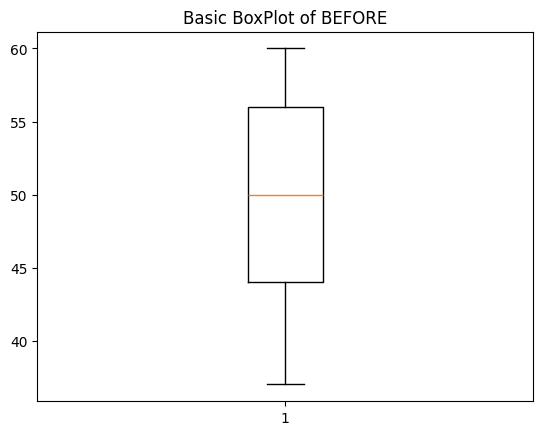

In [10]:
# b4 boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Basic BoxPlot of BEFORE')
_ = ax1.boxplot(b4)

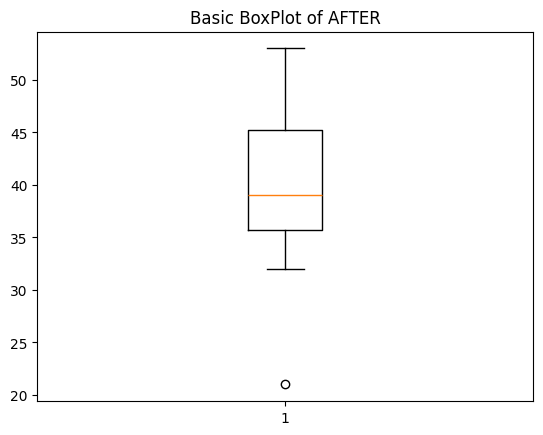

In [14]:
# after boxplot
fig2, ax2 = plt.subplots()
ax2.set_title('Basic BoxPlot of AFTER')
_ = ax2.boxplot(after)

# 2.1

In [21]:
# load user data
users = np.loadtxt('Prob2-Load-Concurrent-Users.txt')
users

array([17.2, 22.1, 18.5, 17.2, 18.6, 14.8, 21.7, 15.8, 16.3, 22.8, 24.1,
       13.3, 16.2, 17.5, 19. , 23.9, 14.8, 22.2, 21.7, 20.7, 13.5, 15.8,
       13.1, 16.1, 21.9, 23.9, 19.3, 12. , 19.9, 19.4, 15.4, 16.7, 19.5,
       16.2, 16.9, 17.1, 20.2, 13.4, 19.8, 17.7, 19.7, 18.7, 17.6, 15.9,
       15.2, 17.1, 15. , 18.8, 21.6, 11.9])

In [19]:
#sample mean,sample var, sample std
np.mean(users),np.var(users,ddof=1),np.std(users,ddof=1)

(np.float64(17.954),
 np.float64(9.968248979591836),
 np.float64(3.1572533917301975))

# 2.2
True std error of sample mean = $\sigma(\bar{X})$  
    We know $\sigma^2(\bar{X}) = \sigma^2\left(\dfrac{1}{n} \sum\limits_i X_i\right) = 
    \dfrac{1}{n^2}\sum\limits_i \sigma^2(X_i) =
\dfrac{\sigma^2(X)}{n}$

We can estimate $\sigma^2(X)$ by $s^2(X)$ (sample variance).  
That means variance of $\bar{X}$ estimated by $\dfrac{s^2(X)}{n}$  
So, std error of sample mean is estimated by $\dfrac{s(X)}{\sqrt{n}}$

In [134]:
n = users.shape[0]
s = np.std(users,ddof=1)
err = s/mth.sqrt(n)
print(err)

0.44650305664332995


# 2.3

In [144]:
# compute min,max,median,Q1,Q3 for b4
print (users.min() )
print ( users.max() )
np.percentile(users,[25,50,75])

11.9
24.1


array([15.825, 17.55 , 19.875])

{'whiskers': [<matplotlib.lines.Line2D at 0x2387fe5c550>,
 'caps': [<matplotlib.lines.Line2D at 0x2387fe5c7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2387fe5c410>],
 'medians': [<matplotlib.lines.Line2D at 0x2387fe5ca50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2387fe5cb90>],
 'means': []}

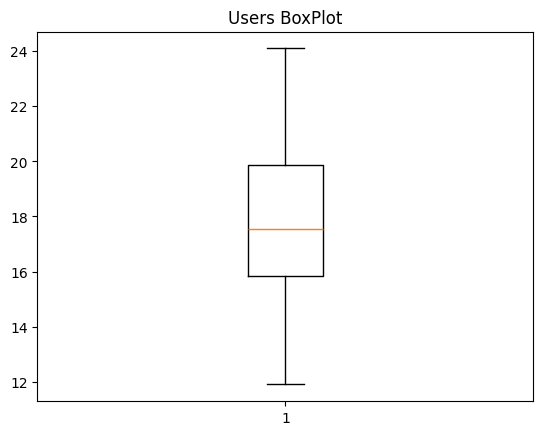

In [145]:
fig3, ax3 = plt.subplots()
ax3.set_title('Users BoxPlot')
ax3.boxplot(users)

# 2.4

In [147]:
iq13 = np.percentile(users,[25,75])
inter_quartile_range = iq13[1] - iq13[0]
print(inter_quartile_range)
in_range = [iq13[0] - (inter_quartile_range*1.5), iq13[1] + (inter_quartile_range*1.5)]
print(in_range)

4.049999999999999
[np.float64(9.750000000000004), np.float64(25.95)]


There isn't an outlier. 

# 2.5
 It is reported that the number of concurrent users follows approximately Normal distribution. The histogram does not provide sufficient evidence to support this claim as there is a dip between value 14 and 16, so it could be a combination of normal distributions. 

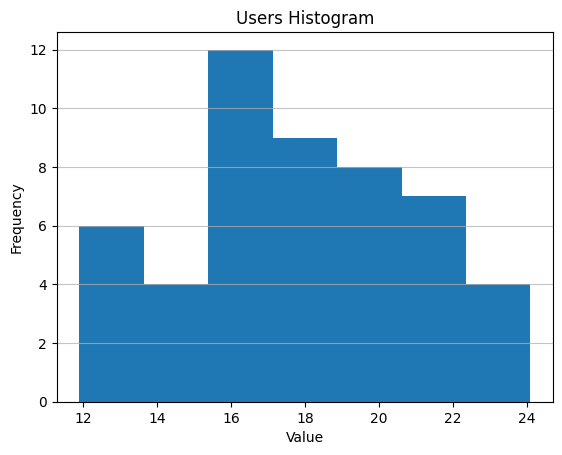

In [31]:
# draw histogram
n, bins, patches = plt.hist(x=users, bins='auto',)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.title('Users Histogram')


# 3.1

In [33]:
# load data
cpu = np.loadtxt('Prob3-CPU-Time.txt')

# 3.2 3.3

In [35]:
cpu.mean(), cpu.var(), cpu.std()

(np.float64(48.233333333333334),
 np.float64(679.7122222222222),
 np.float64(26.07129114988788))

# 3.4
[4 pts] The true distribution of the CPU time for a job is unknown. It is still possible, however, to estimate some aspects of the CPU time. Assume that the sample mean is the true mean of the CPU time distribution. Also, assume the sample variance is the true variance. Using these assumptions, show that at least 0.889 of all tasks require less than 127.78 seconds of CPU time. Hint: Use Chebyshev’s inequality 


Chebyshev's Inequality:
>$
  \mathcal{P}\{|X - \mu|\geq \epsilon\} \leq \left(\dfrac{\sigma}{\epsilon}\right)^2
$

#### What we are seeking:
$\mathcal{P}\{X \leq 127.78\} \geq 0.889$

#### Compute what we seek
Starting with Chebyshev’s inequality
>$
\mathcal{P}\{|X - \mu| \geq \epsilon) \leq \left(\frac{\sigma}{\epsilon}\right)^2$

>$ (\mathcal{P}\{X - \mu \geq \epsilon\} + \mathcal{P}\{ X - \mu \leq -\epsilon\}) \leq
\left(\dfrac{\sigma}{\epsilon}\right)^2
$

>$
   \text{bound} = \mu + \epsilon
$

Also, note that
$\mathcal{P}\{ X - \mu \leq -\epsilon\} \geq 0$,
So,
>$
  \mathcal{P}\{X - \mu \geq \epsilon\} \leq
  \left(\dfrac{\sigma}{\epsilon}\right)^2
$

Or
>$
  \mathcal{P}\{X \geq B\} \leq
  \left(\dfrac{\sigma}{\epsilon}\right)^2
$




1 minus rhs and lhs gives us the inequality we are seeking. 
$\mathcal{P}\{X \leq 127.78\}  \geq 1 - \left(\dfrac{\sigma}{\epsilon}\right)^2 $

In [156]:
bound = 127.78
err = bound - cpu.mean()
print(err)

sigma = np.std(cpu, ddof=1)

P = 1 - ( (sigma**2)/ (79.59)**2 )
print(P)

79.54666666666667
0.8889978663718773


# 4
 Two (possibly) related variables scatter plots

# 4.1
[4 pts] Construct a time plot for the U.S. population. What kind of trend do you see? What information can be extracted from this plot? These data are available in data set PopulationUSA. 

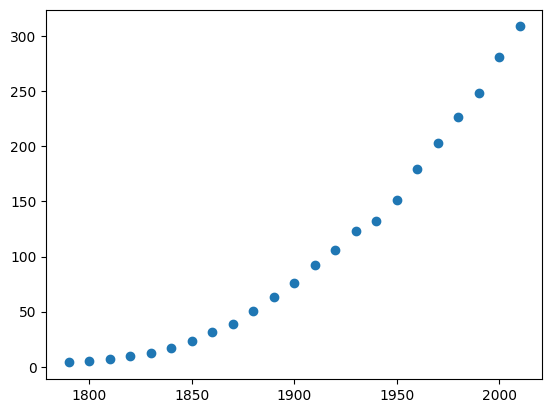

In [122]:
# load data
yr, pop = np.loadtxt('Prob4-US-Population-per-Decade.txt')
# draw scatter plot
_ = plt.scatter(yr,pop)

There is an upward trend following an exponential growth curve. The population generally grows exponentially

# 4.2
[4 pts] Compute 10-year increments of the population growth x1 = 5.3 − 3.9, x2 = 7.2 − 5.3, etc. 
# 4.3
[4 pts] Construct a time plot of 10-year increments and discuss the observed pattern. 

U.S. population change over the years has had a generally linear upward trend, except for some outlier points, which might be attributed to historical events such as wars, diseases, and economic depressions

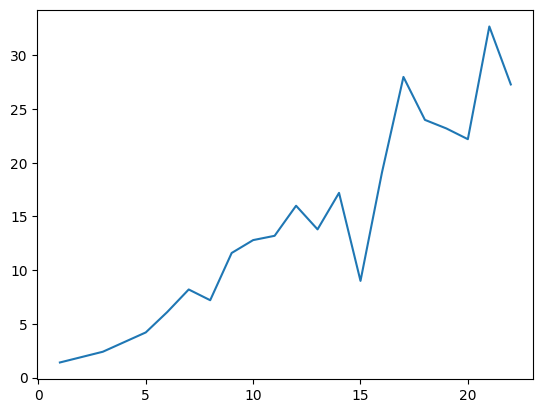

In [148]:
# compute 10 yr inc
y10inc = pop[1:] - pop[0:-1]
# 10-year increments of the population growth
_ = plt.plot(range(1,len(y10inc)+1), y10inc)


# 4.2 cont

In [149]:
# sample mean, median, and variance of 10-year increments
np.mean(y10inc), np.median(y10inc), np.var(y10inc ,ddof=1)

(np.float64(13.854545454545455),
 np.float64(13.0),
 np.float64(87.60354978354977))

U.S. population change over the years has increased somewhat linearly and averages at 13.8 million people each year.

# 4.4
[4 pts] Compute 10-year relative population change y1 = (5.3 − 3.9)/3.9, y2 = (7.2 − 5.3)/5.3, etc. 

In [131]:
# compute 10 yr inc rel
y10inc_rel = (pop[1:] - pop[0:-1])/ pop[0:-1]


# 4.5
[4 pts] Compute sample mean, median, and variance of the relative population change. 

In [130]:
# sample mean, median, and variance of 10-year increments
np.mean(y10inc_rel), np.median(y10inc_rel), np.var(y10inc_rel,ddof=1)

(np.float64(0.22380057356285804),
 np.float64(0.20974878140232472),
 np.float64(0.010250379905134974))


# 4.6
[4 pts] Construct a time plot of the relative population change. What trend do you see now? 

Text(0.5, 1.0, 'Time Plot Relative Population Change')

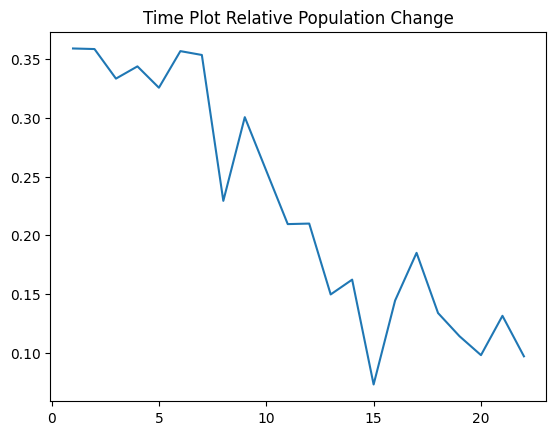

In [132]:
# 10-year increments of the population growth
_ = plt.plot(range(1, len(y10inc_rel) + 1), y10inc_rel)

plt.title('Time Plot Relative Population Change')

Relative population change is generally downward, suggesting that the population increase relative to the population of the previous year is declining somewhat linearly. 

# 5.
[8 pts] Comparing the time plots in 4.3 vs 4.6, what kind of correlation between the absolute differences as shown by the xi in problem 4.3 and the relative changes shown by the yi in problem 4.6 would you expect? Compare 

your expectations to the sample correlation coefficient 

. What can you conclude? How would you explain this phenomenon? 

sample covariance & sample correlation coefficent
>$
  r = \dfrac{\operatorname{Cov}(X,Y)}{s_X s_Y}
$

In [150]:
# use prev problem year, pop data
scov = np.cov(y10inc, y10inc_rel )[0,1]
print(scov)

# following fomular
sample_r = scov/(np.std(y10inc ,ddof=1)*np.std(y10inc_rel ,ddof=1))
print(sample_r)

-0.7471171231666893
-0.7884204073309351


My prediction before the stats is that the covariance and covariance coefficient are negative because of the opposite trends observed in graphs 4.3 and 4.6.

Covariance is negative, meaning that although the absolute difference increases, the relative change in population actually decreases. This aligns with my prediction, according to the two opposite trends observed in graphs 4.3 and 4.6.

The covariance coefficient is close to -1, indicating a strongly negative linear relationship, meaning that when one variable increases, there is a strong indication that the other decreases.

# 6
3 data sets, histograms, sample means, sample medians

# 6.1a
[4 pts] For each data set, construct a histogram and determine whether the distribution is right-skewed, left-skewed, or symmetric. 

In [103]:
# load user data
prob61 = np.loadtxt('Prob6-skewed-dataset-1.txt', delimiter = ',')
prob61

array([19., 24., 12., 19., 18., 24.,  8.,  5.,  9., 20., 13., 11.,  1.,
       12., 11., 10., 22., 21.,  7., 16., 15., 15., 26., 16.,  1., 13.,
       21., 21., 20., 19.])

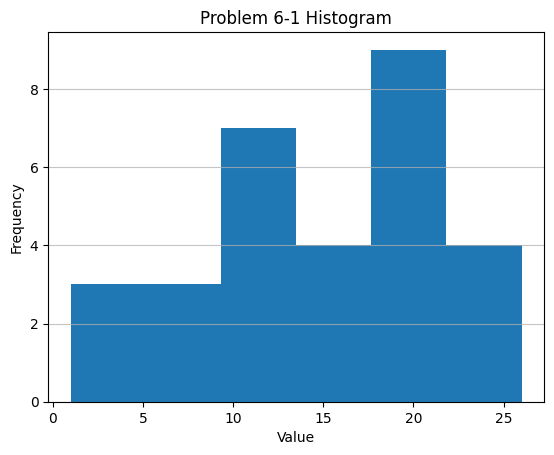

In [104]:
# draw histogram
n, bins, patches = plt.hist(x=prob61, bins='auto',)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.title('Problem 6-1 Histogram')

In [110]:
np.mean(prob61), np.median(prob61)

(np.float64(14.966666666666667), np.float64(15.5))

# 6.2a
[4 pts] Compute sample means and sample medians. Do they support your findings about skewness and symmetry? How? 

Distribution is skewed left. Mean is less than Median. Small values is less frequent than large values.  

# 6.1b

In [107]:
# load user data
prob62 = np.loadtxt('Prob6-skewed-dataset-2.txt', delimiter = ',')
prob62

array([17., 24., 21., 22., 26., 22., 19., 21., 23., 11., 19., 14., 23.,
       25., 26., 15., 17., 26., 21., 18., 19., 21., 24., 18., 16., 20.,
       21., 20., 23., 33.])

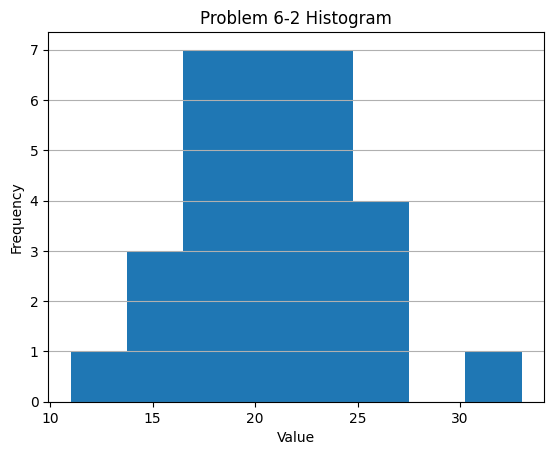

In [116]:
# draw histogram
n, bins, patches = plt.hist(x=prob62, bins='auto',)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.title('Problem 6-2 Histogram')

In [114]:
np.mean(prob62), np.median(prob62)

(np.float64(20.833333333333332), np.float64(21.0))

# 6.2b
[4 pts] Compute sample means and sample medians. Do they support your findings about skewness and symmetry? How?

Distribution is slightly skewed left. Mean is less than Median. Small values is less frequent than large values.  

# 6.1c

In [106]:
# load user data
prob63 = np.loadtxt('Prob6-skewed-data-set-3.txt', delimiter = ',')
prob63

array([56., 52., 13., 34., 33., 18., 44., 41., 48., 75., 24., 19., 35.,
       27., 46., 62., 71., 24., 66., 94., 40., 18., 15., 39., 53., 23.,
       41., 78., 15., 35.])

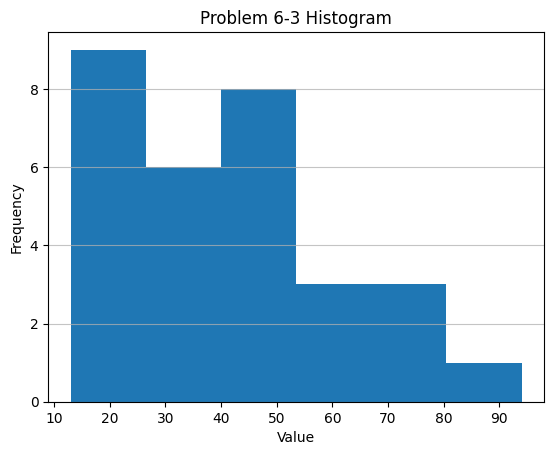

In [118]:
# draw histogram
n, bins, patches = plt.hist(x=prob63, bins='auto',)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.title('Problem 6-3 Histogram')

In [119]:
np.mean(prob63), np.median(prob63)

(np.float64(41.3), np.float64(39.5))

# 6.2c
[4 pts] Compute sample means and sample medians. Do they support your findings about skewness and symmetry? How? 

Distribution is skewed right. Mean is greater than Median. Small values is more frequent than large values.  

# 7
5 point summary, interquartile distance, outliers, delete outliers, recompute

In [57]:
# load user data
new = np.loadtxt('Prob7-new-computer-accounts.txt', delimiter=',')
new

array([ 43.,  37.,  50.,  51.,  58., 105.,  52.,  45.,  45.,  10.])

# 7.1
[4 pts] Compute the mean, median, quartiles, and standard deviation. 

In [154]:
# compute,Q1,Q3 
print ( np.percentile(new,[25,75]) )
#sample mean, sample std, median
np.mean(new),np.std(new,ddof=1),np.median(new)

[43.5  51.75]


(np.float64(49.6), np.float64(23.476702399518455), np.float64(47.5))

# 7.2
[4 pts] Check for outliers using the 1.5(IQR) rule. 

In [85]:
iq = np.percentile(new,[25,75])
print(iq)
inter_quartile_range = iq[1] - iq[0]
print(inter_quartile_range)
in_range = [iq[0] - (inter_quartile_range*1.5), iq[1] + (inter_quartile_range*1.5)]
print(in_range)

[43.5  51.75]
8.25
[np.float64(31.125), np.float64(64.125)]


Outliers : 105 and 10

{'whiskers': [<matplotlib.lines.Line2D at 0x2387e4ed1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2387e4eed50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2387e4eccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2387e4ed450>],
 'fliers': [<matplotlib.lines.Line2D at 0x2387e4ee990>],
 'means': []}

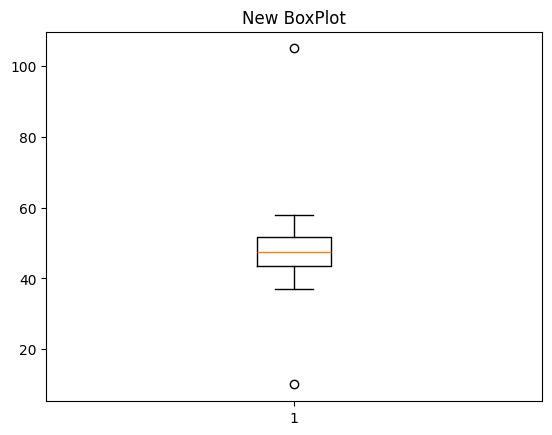

In [84]:
fig7, ax7 = plt.subplots()
ax7.set_title('New BoxPlot')
ax7.boxplot(new)

# 7.3
[4 pts] Delete the detected outliers and compute the mean, median, quartiles, and standard deviation again. 

In [97]:
new1 = np.delete(new, np.where(new>64.125))

In [99]:
new1 = np.delete(new1, np.where(new1<31.125))
print(new1)

[43. 37. 50. 51. 58. 52. 45. 45.]


In [155]:
# compute q1 q3
print (np.percentile(new1,[25,75]))
#sample mean, sample std, median
np.mean(new1),np.std(new1,ddof=1),np.median(new1)

[44.5  51.25]


(np.float64(47.625), np.float64(6.4572771793867245), np.float64(47.5))

# 7.4
[4 pts] Make a conclusion about the effect of outliers on basic descriptive statistics. 

The mean is more likely affected or is more sensitive to ouliers than the median. In this case, outliers reduce the mean and does not affect the median. The reason could be outliers from the upperbound have greater difference to the mean than the outliers from the lower bound. 